### Import The libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset (assume CSV format)

In [2]:
df = pd.read_csv('olympics_data.csv', encoding='ISO-8859-1')

## Check the first few rows of the dataset`

In [3]:
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


## Summary of the dataset

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


### Step 2: Data Cleaning
Check for missing values and remove or impute them if necessary.

In [5]:
# Check for missing values
print(df.isnull().sum())
# Drop rows with missing values if any
df_cleaned = df.dropna()
# After cleaning, check the dataset again
print(df_cleaned.info())

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


### Exploratory Data Analysis (EDA)
 1 Total Medal Count by Country

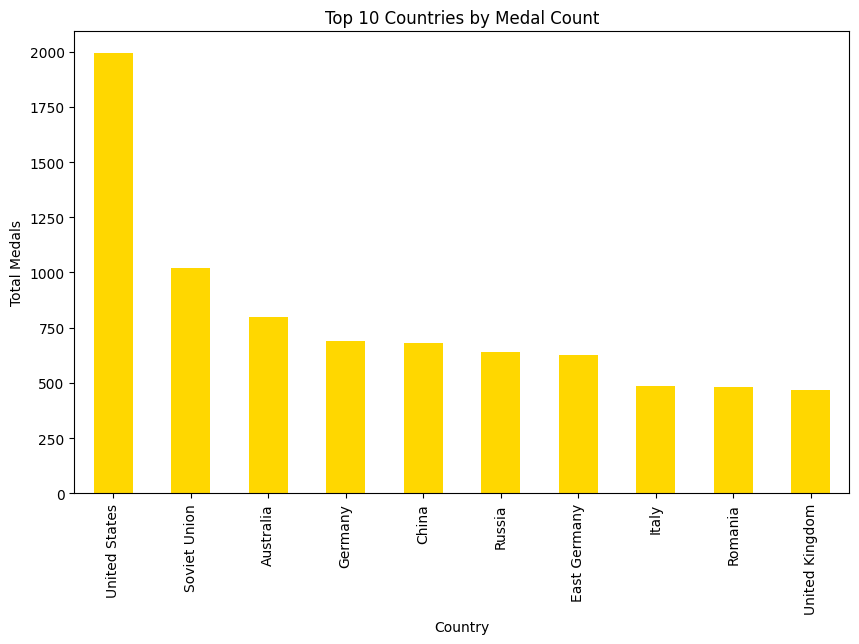

In [6]:

# Total medals won by each country
medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)
# Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

### 3.2 Medals Won Over the Years

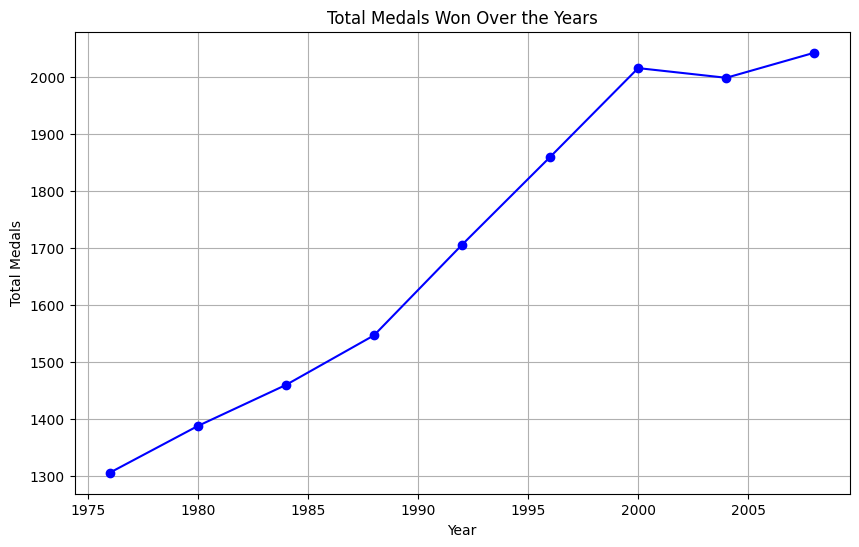

In [7]:
# Grouping by Year and counting the medals won
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()
# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,
marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

### 3.3 Gender Distribution in Events

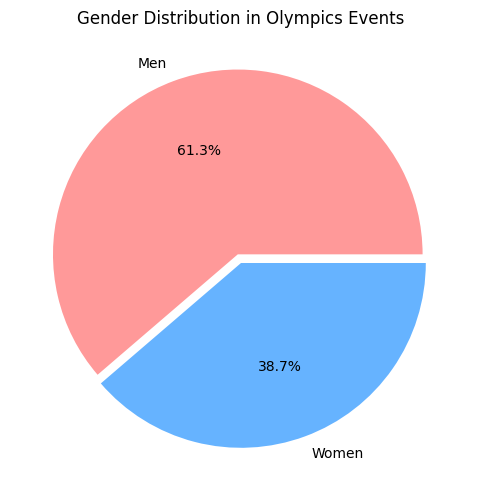

In [12]:
# Gender distribution in events
gender_distribution = df_cleaned['Gender'].value_counts()
# Plotting gender distribution
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

### 3.4 Top Athletes with Most Medals

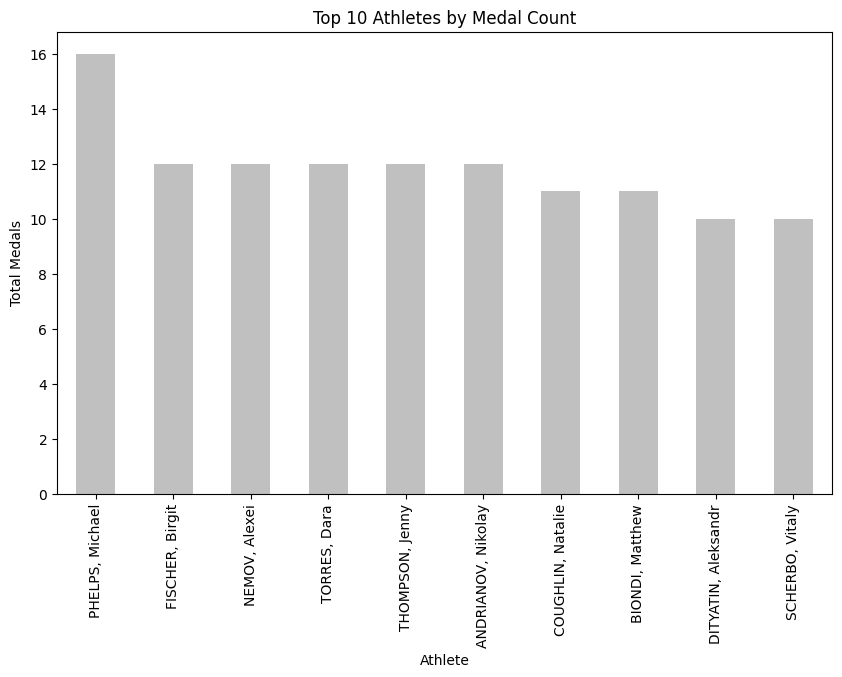

In [14]:
# Group by Athlete and count the number of medals
athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

### Understand the events

In [27]:

q3_data = df_cleaned[['Sport', 'Discipline','Event']].drop_duplicates()
print("Total number of unique events are held so far are :",len(q3_data))
q3_data

Total number of unique events are held so far are : 334


,Sport,Discipline,Event
0,0,Diving,3m springboard
4,0,Diving,10m platform
12,0,Swimming,4x100m freestyle relay
13,0,Swimming,400m freestyle
15,0,Swimming,1500m freestyle
...,...,...,...
15016,18,Sailing,Laser Radial - One Person Dinghy
15020,18,Sailing,Finn - Heavyweight Dinghy
15026,18,Sailing,Laser - One Person Dinghy
15029,18,Sailing,RS:X - Windsurfer


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27')])

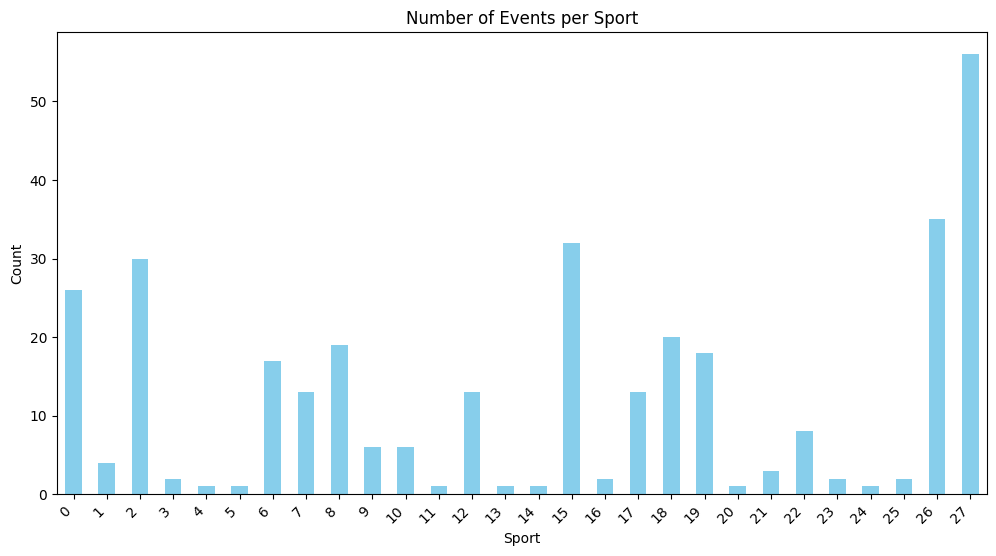

In [28]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (12,6))
q3_data.plot(x = 'Sport', y = 'Count',kind='bar', color='skyblue')
plt.xlabel("Sport")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Number of Events per Sport")  # Title
plt.xticks(rotation=45, ha='right')


### Gender ratio in winning teams

<Axes: ylabel='Gender'>

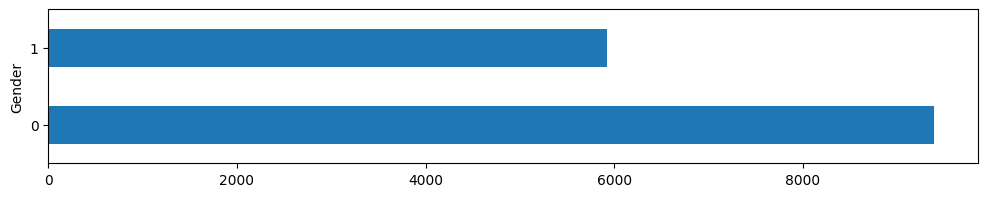

In [30]:
q5_data = df_cleaned.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q5_data.plot.barh(x = 'Athlete', y = 'Count')

### Which country has win most medal and how many in each year?

In [35]:
q6_data = df_cleaned[['Year', 'Country', 'Medal']]
q6_data = q6_data.groupby(['Year', 'Country', 'Medal'])['Country'].count().reset_index(name='Count')
q6_data['Medal'] = pd.Categorical(q6_data['Medal'], categories=['Gold', 'Silver', 'Bronze'], ordered=True)
q6_data = q6_data.sort_values(by=['Year', 'Country', 'Medal'], ascending=[True, True, True])
q6_data = q6_data.pivot(index=['Year', 'Country'], columns='Medal', values='Count').reset_index()
q6_data = q6_data.fillna(0)

# Ensure all medal columns are present
for medal in ['Gold', 'Silver', 'Bronze']:
	if medal not in q6_data.columns:
		q6_data[medal] = 0

q6_data['Sum'] = q6_data['Gold'] + q6_data['Silver'] + q6_data['Bronze']
q6_data = q6_data.sort_values(by=['Year', 'Sum'], ascending=[True, False])
q6_data.columns.name = None
print(q6_data['Country'].unique())
q6_data

['Australia' 'Austria' 'Belgium' 'Bermuda*' 'Brazil' 'Bulgaria' 'Canada'
 'Cuba' 'Czechoslovakia' 'Denmark' 'East Germany' 'Finland' 'France'
 'Hungary' 'Iran' 'Italy' 'Jamaica' 'Japan' 'Korea, North' 'Korea, South'
 'Mexico' 'Mongolia' 'Netherlands' 'New Zealand' 'Norway' 'Pakistan'
 'Poland' 'Portugal' 'Puerto Rico*' 'Romania' 'Soviet Union' 'Spain'
 'Sweden' 'Switzerland' 'Thailand' 'Trinidad and Tobago' 'United Kingdom'
 'United States' 'Venezuela' 'West Germany' 'Yugoslavia' 'Ethiopia'
 'Greece' 'Guyana' 'India' 'Ireland' 'Lebanon' 'Tanzania' 'Uganda'
 'Zimbabwe' 'Algeria' 'Cameroon' 'China' 'Colombia' "Cote d'Ivoire"
 'Dominican Republic' 'Egypt' 'Iceland' 'Kenya' 'Morocco' 'Nigeria' 'Peru'
 'Syria' 'Taiwan' 'Turkey' 'Zambia' 'Argentina' 'Chile' 'Costa Rica'
 'Djibouti' 'Indonesia' 'Netherlands Antilles*' 'Philippines' 'Senegal'
 'Suriname' 'Virgin Islands*' 'Bahamas' 'Croatia' 'Estonia' 'Germany'
 'Ghana' 'Independent Olympic Participants (1992)' 'Israel' 'Latvia'
 'Lithuania' '

,Year,Country,NaN,Gold,Silver,Bronze,Sum
0,1976.0,Australia,24,0,0,0,0
1,1976.0,Austria,1,0,0,0,0
2,1976.0,Belgium,9,0,0,0,0
3,1976.0,Bermuda*,1,0,0,0,0
4,1976.0,Brazil,3,0,0,0,0
...,...,...,...,...,...,...,...
554,2008.0,United States,315,0,0,0,0
555,2008.0,Uzbekistan,6,0,0,0,0
556,2008.0,Venezuela,1,0,0,0,0
557,2008.0,Vietnam,1,0,0,0,0
